## Python ML Classification Project Airline customer satisfaction level Decision Tree

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [225]:
cd D:\Data Science\Project\P5

D:\Data Science\Project\P5


In [226]:
df=pd.read_csv("Python_Project_5.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         10000 non-null  int64  
 1   id                                 10000 non-null  int64  
 2   Gender                             10000 non-null  object 
 3   Customer Type                      10000 non-null  object 
 4   Age                                10000 non-null  int64  
 5   Type of Travel                     10000 non-null  object 
 6   Class                              10000 non-null  object 
 7   Flight Distance                    10000 non-null  int64  
 8   Inflight wifi service              10000 non-null  int64  
 9   Departure/Arrival time convenient  10000 non-null  int64  
 10  Ease of Online booking             10000 non-null  int64  
 11  Gate location                      10000 non-null  int6

## Part-1: Data Exploration and Pre-processing

## 1) load the given dataset

## 2) print all the column names 

In [228]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## 3) describe the data

In [229]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


## 4) Drop the column ‘Unnamed’ 

In [230]:
df=df.drop("Unnamed: 0",axis=1)

## 5) Replace all the “ “ in column with “_”

In [231]:
df.columns=[each.replace(" ","_") for each in df.columns]
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

## 6) Plot the number of satisfied customers and the number of unsatisfied customers 

In [232]:
df['satisfaction'].value_counts()

neutral or dissatisfied    5689
satisfied                  4311
Name: satisfaction, dtype: int64

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

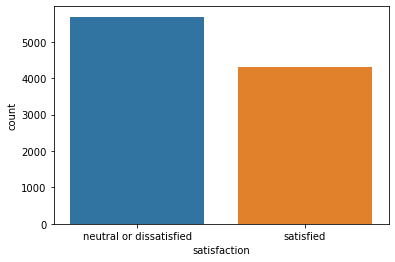

In [233]:
sns.countplot(x="satisfaction", data=df)

## 7) Plot the mean value of satisfaction of male and female customers 

In [234]:
df['Customer_Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [235]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [236]:
df['Type_of_Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [237]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [238]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [239]:
from sklearn.preprocessing import LabelEncoder

In [240]:
label_encode=LabelEncoder()

In [241]:
df[['Gender','Customer_Type','Type_of_Travel','Class','satisfaction']] = df[['Gender','Customer_Type','Type_of_Travel','Class','satisfaction']].apply(label_encode.fit_transform)

In [242]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [243]:
df[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
1,1,0.438062
0,0,0.424432


# 8) Plot the mean value of satisfaction of customers with respect to Age

In [244]:
df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
71,79,0.666667
39,46,0.643192
34,41,0.632743
38,45,0.608466
66,73,0.600000
...,...,...
7,14,0.076923
0,7,0.071429
59,66,0.050000
69,76,0.000000


## 9) Plot the mean value of satisfaction of customers with respect to Food_and_drink.

In [245]:
df[["Food_and_drink","satisfaction"]].groupby(["Food_and_drink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Food_and_drink,satisfaction
0,0,0.625000
5,5,0.566176
4,4,0.515050
3,3,0.404990
2,2,0.362305
1,1,0.198142


## 10) Display a boxplot for Flight_Distance

{'whiskers': [<matplotlib.lines.Line2D at 0x2b7bc88dd60>,
 'caps': [<matplotlib.lines.Line2D at 0x2b7bc89b460>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b7bc88da00>],
 'medians': [<matplotlib.lines.Line2D at 0x2b7bc89bb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b7bc89be80>],
 'means': []}

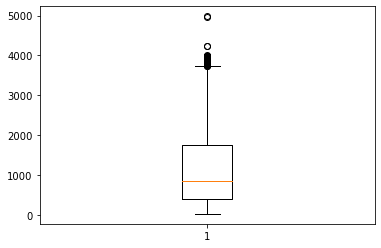

In [246]:
plt.boxplot(df["Flight_Distance"])

## 11) Display a boxplot for Checkin_service 

{'whiskers': [<matplotlib.lines.Line2D at 0x2b7bc7f0250>,
 'caps': [<matplotlib.lines.Line2D at 0x2b7bc7f0910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b7bc7e2eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b7bc7f0fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b7bc7fa370>],
 'means': []}

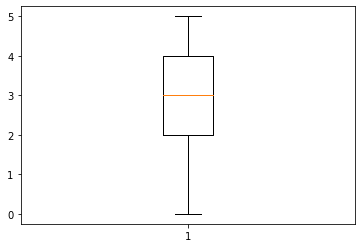

In [247]:
plt.boxplot(df['Checkin_service'])

## 12) Find all the Null values 

In [248]:
df.isnull().sum()

id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

## 13) Drop all the na values

In [249]:
df = df.dropna()
df

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,1,0,50,0,0,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.0,1
9996,22044,1,0,38,0,0,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.0,1
9997,14057,0,0,39,0,0,319,4,4,4,...,4,4,4,4,3,4,2,0,0.0,1
9998,113848,1,0,52,0,0,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.0,1


## 14) Find the unique values in Flight_Distance 

In [250]:
df['Flight_Distance'].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

# Part-2: Working with Models

## 1) Perform encoding in columns Gender, Customer_Type,Type_of_Travel, and Class.

In [251]:
##As Above it done

In [252]:
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].astype('int64')

## 2) Drop the column id

In [253]:
df=df.drop("id",axis=1)
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0,1


## 3) Create the features and target Data

In [254]:
feature_data=df.drop('satisfaction',axis=1)
feature_data.head(200)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,45,1,1,173,2,5,0,1,...,5,2,5,5,4,4,4,2,0,0
196,1,0,43,0,0,1950,3,3,3,3,...,4,4,4,4,4,3,4,5,0,0
197,0,0,52,1,1,719,1,5,2,2,...,5,3,3,2,3,3,3,3,0,17
198,0,0,57,0,0,153,3,4,4,4,...,4,2,2,2,3,4,2,2,0,0


In [255]:
target_data=df["satisfaction"]
target_data.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int32

## 4) Perform scaling on features data

In [256]:
#df['Departure_Delay_in_Minutes'].unique()

In [257]:
#df['Arrival_Delay_in_Minutes'].unique()

In [258]:
from sklearn.preprocessing import StandardScaler

In [259]:
stand_scaler=StandardScaler()

In [260]:
feature_data[['Class','Inflight_wifi_service','Departure/Arrival_time_convenient','Ease_of_Online_booking','Gate_location','Food_and_drink','Online_boarding','Seat_comfort','Inflight_entertainment','On-board_service','Leg_room_service','Baggage_handling','Checkin_service','Inflight_service','Cleanliness',]]=stand_scaler.fit_transform(feature_data[['Class','Inflight_wifi_service','Departure/Arrival_time_convenient','Ease_of_Online_booking','Gate_location','Food_and_drink','Online_boarding','Seat_comfort','Inflight_entertainment','On-board_service','Leg_room_service','Baggage_handling','Checkin_service','Inflight_service','Cleanliness',]])

In [261]:
from sklearn.preprocessing import RobustScaler

In [262]:
r_scaler=RobustScaler()

In [263]:
feature_data[['Age','Flight_Distance','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']]=r_scaler.fit_transform(feature_data[['Age','Flight_Distance','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']])

In [264]:
#feature_data.columns

In [265]:
#feature_data.head(300)

## 6) Split the data in training and testing sets

In [275]:
x_train,x_test,y_train,y_test = train_test_split(feature_data,target_data,test_size=0.2,random_state=25)

In [276]:
x_train.shape

(7979, 22)

In [277]:
y_train.shape

(7979,)

## 5) Fit the decision tree model with various parameters

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [285]:
dtc_model=DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=2,criterion='gini')

In [286]:
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

## 7) Create a function to display precision score, recall score, accuracy, classification report, confusion matrix, F1 Score.

In [290]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [291]:
y_pred = dtc_model.predict(x_test)

In [305]:
def run_model(dtc_model,x_train, y_train, x_test, y_test):
    y_pred = dtc_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("pricison_score: ",precision_score(y_test, y_pred))
    print("recall_score: ",recall_score(y_test, y_pred))
    print("Accuracy:",accuracy)
    print("Classification Report :","\n",classification_report(y_test,y_pred,digits=4))
    print("Confusion Matrix :","\n",confusion_matrix(y_test,y_pred))

In [306]:
run_model(dtc_model,x_train, y_train, x_test, y_test)

pricison_score:  0.9248768472906403
recall_score:  0.8994011976047904
Accuracy: 0.9273182957393483
Classification Report : 
               precision    recall  f1-score   support

           0     0.9290    0.9474    0.9381      1160
           1     0.9249    0.8994    0.9120       835

    accuracy                         0.9273      1995
   macro avg     0.9269    0.9234    0.9250      1995
weighted avg     0.9273    0.9273    0.9272      1995

Confusion Matrix : 
 [[1099   61]
 [  84  751]]
